In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [6]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=xtrain.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(xtrain_scaled, ytrain,
                        validation_data = (xvalid_scaled, yvalid),
                        epochs = 10,
                        callbacks = callbacks)
    histories.append(history)

Epoch 1/10
363/363 [==============================] - 0s 892us/step - loss: 4.3563 - val_loss: 3.8119
Epoch 2/10
363/363 [==============================] - 0s 655us/step - loss: 3.2428 - val_loss: 2.8939
Epoch 3/10
363/363 [==============================] - 0s 661us/step - loss: 2.5316 - val_loss: 2.2975
Epoch 4/10
363/363 [==============================] - 0s 708us/step - loss: 2.0548 - val_loss: 1.8864
Epoch 5/10
363/363 [==============================] - 0s 642us/step - loss: 1.7255 - val_loss: 1.6017
Epoch 6/10
363/363 [==============================] - 0s 634us/step - loss: 1.4911 - val_loss: 1.3988
Epoch 7/10
363/363 [==============================] - 0s 667us/step - loss: 1.3176 - val_loss: 1.2512
Epoch 8/10
363/363 [==============================] - 0s 646us/step - loss: 1.1870 - val_loss: 1.1412
Epoch 9/10
363/363 [==============================] - 0s 658us/step - loss: 1.0870 - val_loss: 1.0599
Epoch 10/10
363/363 [==============================] - 0s 647us/step - loss: 1.009

C:\Users\lxinp\Documents\Envs\tf2_py3\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


363/363 [==============================] - 0s 649us/step - loss: nan - val_loss: nan
Epoch 3/10
363/363 [==============================] - 0s 639us/step - loss: nan - val_loss: nan
Epoch 4/10
363/363 [==============================] - 0s 656us/step - loss: nan - val_loss: nan
Epoch 5/10
363/363 [==============================] - 0s 647us/step - loss: nan - val_loss: nan


Learning rate:  0.0001


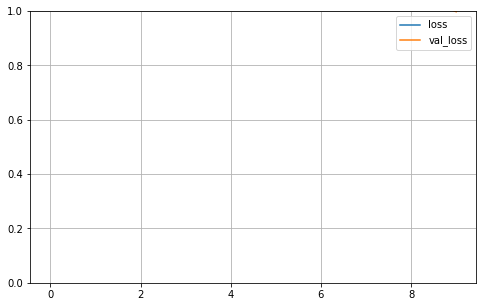

Learning rate:  0.0003


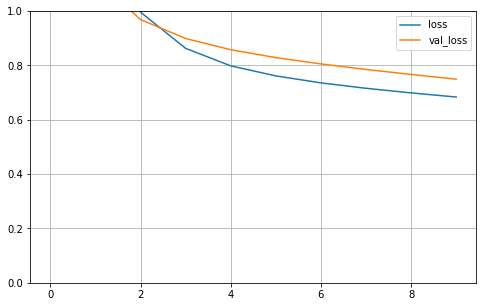

Learning rate:  0.001


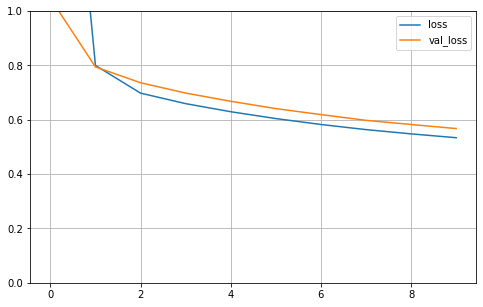

Learning rate:  0.003


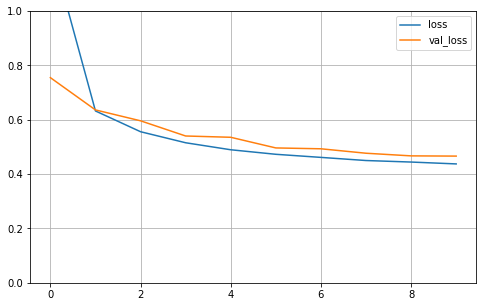

Learning rate:  0.01


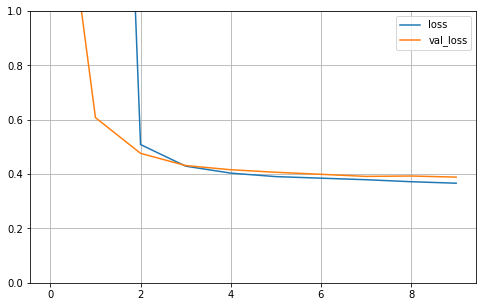

Learning rate:  0.03


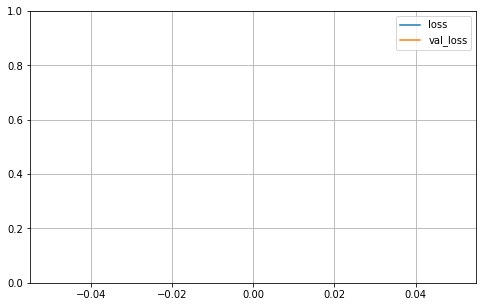

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    plot_learning_curves(history)